In [1]:
# Load the data
import pandas as pd
df = pd.read_csv("/Users/sara/projects/smba/data/raw/genai_data.csv")
print("Data loaded successfully.")
print(df.shape)

Data loaded successfully.
(119, 32)


In [2]:
df.head()

,Timestamp,Are currently employed?,What industry do you work in?,What is your current role or job title?,How many years of professional experience do you have?,Are there any Gen AI tools approved by your organization?,"Do you use any generative AI tools for professional tasks? (e.g., ChatGPT, Copilot, Google Gemini, Claude)",Which Gen AI tool do you use?,How frequently do you use GenAI tools in your professional tasks?,Gen AI tools are very important for my professional tasks,...,"Considering my relationship with Gen AI, it has become something I often rely on.",I feel more confident making decisions at work when I use GenAI,I know how to use GenAI tools to improve the quality of my work related tasks.,My peers at work approve my use of Gen AI.,My manager at work supports my use of Gen AI.,People around me don't show disapproval regarding the use of Gen AI at work,What is your age group?,What is your gender?,What is your highest level of education completed?,What is your country of residence?
0,6/22/2025 15:42:10,Yes,"IT / Tech, Consulting",CEO,More than 15 years,"ChatGPT (OpenAI), Google Gemini (Formerly Bard...",Yes,"ChatGPT (OpenAI), Google Gemini (formerly Bard...",Daily,1.0,...,3.0,3.0,4.0,5.0,5.0,5.0,62,Male,Bachelor’s degree,Brazil
1,6/22/2025 16:05:30,Yes,Law,Attorney,1–3 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),A few times a week,4.0,...,1.0,2.0,4.0,5.0,5.0,5.0,26-35,Female,Bachelor’s degree,Brazil
2,6/22/2025 12:00:17,Yes,IT / Tech,SDE,1–3 years,no,Yes,"ChatGPT (OpenAI), Claude (Anthropic)",A few times a week,3.0,...,4.0,4.0,4.0,4.0,3.0,3.0,18-25,Male,Master’s degree,Canada
3,6/22/2025 16:35:59,Yes,IT / Tech,ERP Finance Consultant,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,2.0,...,4.0,4.0,5.0,3.0,2.0,2.0,26-35,Female,Bachelor’s degree,Canada
4,6/22/2025 15:00:59,Yes,Creative / Media,Marketing manager,4–7 years,ChatGPT (OpenAI),Yes,ChatGPT (OpenAI),Daily,1.0,...,5.0,4.0,5.0,5.0,1.0,4.0,26-35,Male,Bachelor’s degree,Egypt


In [3]:
# Strip the column names
df.columns = df.columns.str.strip()

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]



In [4]:
# Column Renaming
column_mapping = {
    'Timestamp': 'Timestamp',
    'Are currently employed?': 'employment_status',
    'What industry do you work in?': 'industry',
    'What is your current role or job title?': 'current_role',
    'How many years of professional experience do you have?': 'years_of_experience',
    'Are there any Gen AI tools approved by your organization?': 'genai_org_approval',
    'Do you use any generative AI tools for professional tasks? (e.g., ChatGPT, Copilot, Google Gemini, Claude)': 'genai_use',
    'Which Gen AI tool do you use?': 'genai_tools_used',
    'How frequently do you use GenAI tools in your professional tasks?': 'genai_frequency_use',
    'Gen AI tools are very important for my professional tasks': 'genai_importance',
    'Integrate Gen AI with other technologies related to it.': 'skill_integration',
    'Learn to use unfamiliar Gen AI tools.': 'skill_learning',
    'Use Gen AI for simple tasks.': 'simple_tasks_skills',
    'Use Gen AI for complex tasks.': 'complex_tasks_skills',
    'Become skillful using Gen AI.': 'skillfullness',
    'Find support for problems that are beyond my abilities to solve using Gen AI.': 'skills_support',
    'Show people around me how to use it.': 'skill_sharing',
    'I am a better worker with the use of Gen AI.': 'better_worker',
    'I feel personally connected to the Gen AI tools I use in my work.': 'relatedness',
    'Please describe two or three work-related tasks you used Gen AI for.': 'tasks_description',
    'How does it make you feel to report that you used Gen AI for work-related tasks?': 'emotional_energy',
    'I often find myself turning to GenAI as my first step in tackling professional problems.': 'dependancy',
    'Considering my relationship with Gen AI, it has become something I often rely on.': 'reliance',
    'I feel more confident making decisions at work when I use GenAI': 'decision_making_confidence',
    'I know how to use GenAI tools to improve the quality of my work related tasks.': 'quality_improvement',
    'My peers at work approve my use of Gen AI.': 'peers_approval',
    'My manager at work supports my use of Gen AI.': 'manager_support',
    'People around me don\'t show disapproval regarding the use of Gen AI at work': 'general_disapproval',
    'What is your age group?': 'age_group',
    'What is your gender?': 'gender',
    'What is your highest level of education completed?': 'highest_level_of_education',
    'What is your country of residence?': 'country_of_residence', 
}

df.rename(columns=column_mapping, inplace=True)
print("\nColumns renamed.")

# save the cleaned DataFrame to a new CSV file

print("Cleaned data saved to 'cleaned_genai_data.csv'.")


Columns renamed.
Cleaned data saved to 'cleaned_genai_data.csv'.


In [5]:
# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)
df.shape

(119, 31)

In [6]:
# Filter only employed users
df_employed = df[df['employment_status'] == 'Yes']
print("After keeping only employed:", df_employed.shape)
# Filter only GenAI users
df_filtered = df[df['genai_use'] == 'Yes']
print("After keeping employed & GenAI users:", df_filtered.shape)
# Reset index
df.reset_index(drop=True, inplace=True)

print(df_employed.shape)
print(df_filtered.shape)


After keeping only employed: (113, 31)
After keeping employed & GenAI users: (105, 31)
(113, 31)
(105, 31)


In [7]:
df.to_csv('/Users/sara/projects/smba/data/processed/final_cleaned_genai_data.csv', index=True)
print("Final cleaned data saved to 'final_cleaned_genai_data.csv'.")


Final cleaned data saved to 'final_cleaned_genai_data.csv'.


In [8]:
#Thematic analysis of the text columns
tasks_text = df['tasks_description'].dropna().tolist()
emotions_text = df['emotional_energy'].dropna().tolist()


Code frequency:
Coding support: 30
Other: 46
Translation & language support: 5
Research support: 15
Content creation: 38
Strategic planning: 6
Market & competitive analysis: 5
Math & calculations: 5
Idea generation: 11
Design assistance: 3
Process automation: 6
Marketing & SEO support: 2
HR & people support: 4
Administrative tasks: 5
Education: 2
Presentation creation: 4
Data analysis: 8
Learning support: 2
Customer communication: 8
Data entry & management: 3
Medical & healthcare tasks: 3
Summarization: 1
Figure saved as 'task_theme_frequency.png'.


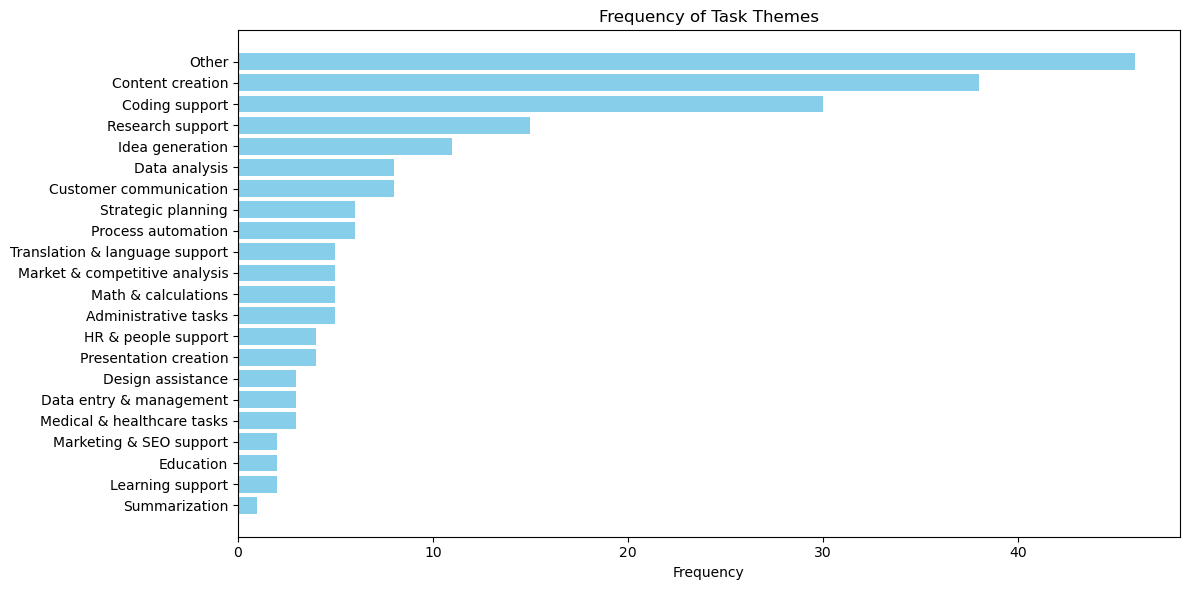

In [9]:
from collections import Counter
import string


suggested_codes = []

for text in tasks_text: 
    codes = []

text_lower = text.lower()
text_clean = text_lower.translate(str.maketrans('', '', string.punctuation))
for text in tasks_text:
    text_lower = text.lower()
    codes = []

    if any(word in text_lower for word in ['write', 'draft', 'report', 'content', 'email', 'copy']):
        codes.append('Content creation')
    if 'code' in text_lower or 'debug' in text_lower or 'script' in text_lower or 'complex products' in text_lower               or 'apps' in text_lower or 'Troubleshooting ' in text_lower              or 'Coding' in text_lower or 'testing' in text_lower or 'technical' in text_lower:
        codes.append('Coding support')
    if 'analy' in text_lower or 'data' in text_lower or 'insight' in text_lower or 'metrics' in text_lower                    or 'dashboard' in text_lower or 'Sheets' in text_lower:
        codes.append('Data analysis')
    if not codes:
        codes.append('Other')



    if 'idea' in text_lower or 'brainstorm' in text_lower or 'concept' in text_lower:
        codes.append('Idea generation')
    if 'admin' in text_lower or 'schedule' in text_lower or'Basic tasks' in text_lower or 'summary' in text_lower or 'documentation' in text_lower or 'minutes' in text_lower or 'Letters.' in text_lower or 'Projekt' in text_lower:
        codes.append('Administrative tasks')
    if 'design' in text_lower or 'visual' in text_lower or 'graphic' in text_lower or 'mockup' in text_lower or 'banner' in text_lower:
        codes.append('Design assistance')
    if 'customer' in text_lower or 'client' in text_lower or 'proposal' in text_lower or 'communication' in text_lower or 'support' in text_lower or 'feedback' in text_lower:
        codes.append('Customer communication')
    if 'translate' in text_lower or 'translation' in text_lower or 'language' in text_lower or 'localization' in text_lower:
        codes.append('Translation & language support')
    if 'presentation' in text_lower or 'slides' in text_lower or 'deck' in text_lower or 'pitch' in text_lower or 'webinar' in text_lower:
        codes.append('Presentation creation')
    if 'learn' in text_lower or 'training' in text_lower or 'tutorial' in text_lower or 'course' in text_lower or 'coaching' in text_lower:
        codes.append('Learning support')
    if 'research' in text_lower or 'literature' in text_lower or 'review' in text_lower or 'survey' in text_lower or 'library' in text_lower or 'terminologies' in text_lower or ' Google search ' in text_lower or 'questions' in text_lower:
        codes.append('Research support')
    if 'summarize' in text_lower or 'summary' in text_lower or 'recap' in text_lower or 'digest' in text_lower:
        codes.append('Summarization')
    if 'automation' in text_lower or 'automate' in text_lower or 'workflow' in text_lower or 'macro' in text_lower:
        codes.append('Process automation')
    if 'strategy' in text_lower or 'plan' in text_lower or 'roadmap' in text_lower:
        codes.append('Strategic planning')
    if 'seo' in text_lower or 'optimization' in text_lower or 'ads' in text_lower or 'campaign' in text_lower:
        codes.append('Marketing & SEO support')
    if 'compliance' in text_lower or 'policy' in text_lower or 'regulation' in text_lower:
        codes.append('Compliance & policy tasks')
    if 'hr' in text_lower or 'recruitment' in text_lower or 'onboarding' in text_lower or 'hiring' in text_lower:
        codes.append('HR & people support')
    if 'competitive' in text_lower or 'benchmark' in text_lower or 'market' in text_lower:
        codes.append('Market & competitive analysis')
    if 'budget' in text_lower or 'finance' in text_lower or 'forecast' in text_lower:
        codes.append('Finance & budgeting tasks')
    if 'equation' in text_lower or 'estimate' in text_lower or 'calculation' in text_lower or 'math' in text_lower or 'formula' in text_lower or 'logic' in text_lower:
        codes.append('Math & calculations')
    if 'Dryg' in text_lower or 'drug' in text_lower or 'patient' in text_lower or 'dosage' in text_lower or 'diagnosis' in text_lower: 
        codes.append('Medical & healthcare tasks')
    if 'SQL' in text_lower or 'queries' in text_lower: 
        codes.append('Data entry & management')
    if 'homework' in text_lower or 'lessons' in text_lower or 'students' in text_lower:
        codes.append('Education')
    if 'Fleet' in text_lower or 'Telematics' in text_lower:
        codes.append('Fleet management')
        
    if any(word in text_clean for word in ['script', 'scripts', 'scipst']):
        codes.append('Coding support')

    if any(word in text_clean for word in ['projekt', 'facharbeit']):
        codes.append('Administrative tasks')

    if 'hilfe' in text_clean or 'benutzt' in text_clean:
        codes.append('Administrative tasks')

# For Arabic or other languages, you can add common words or decide on a manual category, e.g.:
    if any(arabic_word in text for arabic_word in ['يساعدني', 'حياتي', 'العلمي']):
        codes.append('Other')  # Or create a new category 'General support' or 'Multilingual' if you want


    suggested_codes.append(codes)

# Flatten and count
all_codes = [code for sublist in suggested_codes for code in sublist]
code_counts = Counter(all_codes)

print("Code frequency:")
for code, count in code_counts.items():
    print(f"{code}: {count}")

import numpy as np
import matplotlib.pyplot as plt

# Prepare placeholder list with NaNs
full_codes = [np.nan] * len(df)

# Get indices where tasks_description is not null
non_null_indices = df[df['tasks_description'].notnull()].index.tolist()

# Fill codes only for non-null rows
for idx, codes in zip(non_null_indices, suggested_codes):
    full_codes[idx] = '; '.join(codes)

# Add to DataFrame
df['all_codes'] = full_codes

# Prepare data for plotting
themes_sorted = [theme for theme, _ in sorted(code_counts.items(), key=lambda x: x[1], reverse=True)]
counts_sorted = [count for _, count in sorted(code_counts.items(), key=lambda x: x[1], reverse=True)]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(themes_sorted, counts_sorted, color='skyblue')
plt.xlabel("Frequency")
plt.title("Frequency of Task Themes")
plt.gca().invert_yaxis()  # Most frequent on top
plt.tight_layout()

# Save figure
plt.savefig("task_theme_frequency.png", dpi=300, bbox_inches='tight')
print("Figure saved as 'task_theme_frequency.png'.")

plt.show()




In [ ]:
# Export "Other" responses
#other_responses = [tasks_text[i] for i, codes in enumerate(suggested_codes) if codes == ['Other']]
#other_df = pd.DataFrame({'Other responses': other_responses})
#other_df.to_csv('other_task_responses.csv', index=False)
#print("Other responses saved to 'other_task_responses.csv'.")

Other responses saved to 'other_task_responses.csv'.


Figure saved as 'emotional_energy_themes.png'.


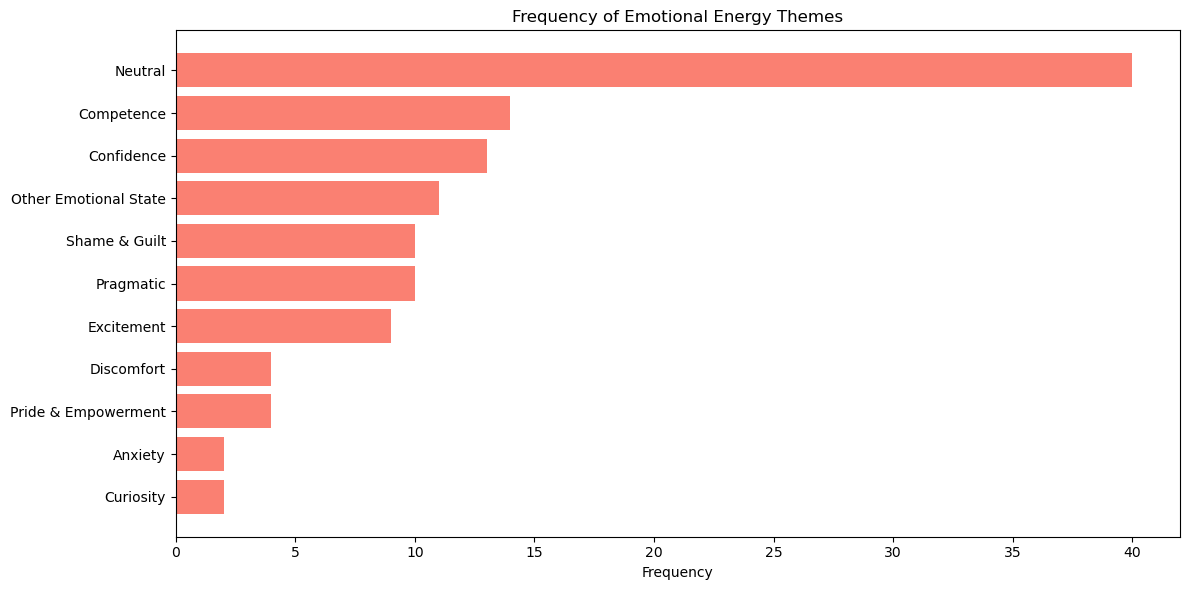

--- Thematic Analysis Results for Emotional Energy ---
Emotional Energy Theme Frequency:
Other Emotional State: 11
Shame & Guilt: 10
Neutral: 40
Pragmatic: 10
Competence: 14
Excitement: 9
Confidence: 13
Discomfort: 4
Anxiety: 2
Curiosity: 2
Pride & Empowerment: 4


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def perform_emotional_energy_analysis(df):
    """
    Performs thematic analysis on the 'emotional_energy' column of an already-filtered DataFrame,
    and saves a horizontal bar plot of theme frequencies.
    """

    # --- Preprocess text ---
    df['emotional_energy'] = (
        df['emotional_energy']
        .astype(str)
        .str.lower()
        .str.strip()
        .str.replace("i’m", "i am")
        .str.replace("it’s", "it is")
        .str.replace("can't", "cannot")
    )

    # --- Remove non-informative entries ---
    non_informative_strings = [
        '.', '', 'don’t know', 'yes', 'nan', 'nothing', 'none',
        'i don\'t know', 'na', 'cool', 'nice', 'rarely used ai for work related tasks.',
        'i don\'t report that', 'coding'
    ]
    df_for_analysis = df[~df['emotional_energy'].isin(non_informative_strings)].copy()

    # --- Extract texts for analysis ---
    emotional_text_series = df_for_analysis['emotional_energy'].dropna()
    emotional_text_indices = emotional_text_series.index.tolist()
    emotional_texts = emotional_text_series.tolist()

    # --- Thematic categorization ---
    suggested_emotional_codes = []
    for text in emotional_texts:
        codes = []

        # Confidence
        if any(word in text for word in ['confident', 'confidante', "i can do this", 'i am ok with that', 'trust', 'professional', "i'm the founder", 'knowledge']):
            codes.append('Confidence')

        # Competence
        if any(word in text for word in ['efficient', 'updated', 'up-to-date', 'tech-skilled', 'productive', 'improve', 'quality', 'accuracy', 'good and efficient', 'i can do this', 'better solutions']):
            codes.append('Competence')

        # Pragmatic
        if any(word in text for word in ['necessary', 'time saving', 'convenient', 'proofread', 'majority of the work', 'as long as it complies', 'technologies are bound', 'management pushing', 'modification not copy', 'supplementary', 'just a tool']):
            codes.append('Pragmatic')

        # Curiosity
        if any(word in text for word in ['curious', 'explore', 'discover', 'learning', 'interest']):
            codes.append('Curiosity')

        # Excitement
        if any(word in text for word in ['cool', 'nice', 'pretty good', 'great', 'happy for the help', 'supportive', 'empowering', 'excited', 'enjoy', 'love']):
            codes.append('Excitement')

        # Pride & Empowerment
        if any(word in text for word in ['proud', 'empowered', 'satisfaction', 'ownership', 'احس بفخر']):
            codes.append('Pride & Empowerment')

        # Shame & Guilt
        if any(word in text for word in ['shameful', 'cheating', 'not good', 'bad about myself', 'losing credit', 'hide', 'not so good']):
            codes.append('Shame & Guilt')

        # Anxiety
        if any(word in text for word in ['worry', 'question abilities', 'over-reliance']):
            codes.append('Anxiety')

        # Discomfort
        if any(word in text for word in ['uncomfortable', 'less comfortable', 'not great', 'not very good']):
            codes.append('Discomfort')

        # Fear
        if any(word in text for word in ['lose job', 'threat', 'afraid']):
            codes.append('Fear')

        # Neutral — after other categories assigned
        if any(word in text for word in ['neutral', 'okay', 'normal', 'fine', 'no problem', 'no big deal', 'indifferent', 'i feel ok', 'its okey', 'yes', 'good', 'na', 'i don’t know', 'it’s recommended']):
            codes.append('Neutral')

        if not codes:
            codes.append('Other Emotional State')

        suggested_emotional_codes.append(codes)

    # --- Add results to DataFrame ---
    df['emotional_energy_codes'] = [[] for _ in range(len(df))]
    codes_series = pd.Series(suggested_emotional_codes, index=emotional_text_indices)
    df.loc[emotional_text_indices, 'emotional_energy_codes'] = codes_series
    df['emotional_energy_codes_str'] = df['emotional_energy_codes'].apply(
        lambda x: '; '.join(x) if isinstance(x, list) and x else None
    )

    # --- Count frequencies ---
    all_codes_flat = [code for sublist in suggested_emotional_codes for code in sublist]
    emotional_code_counts = Counter(all_codes_flat)

    # --- Plot and save ---
    themes_sorted = [theme for theme, _ in sorted(emotional_code_counts.items(), key=lambda x: x[1], reverse=True)]
    counts_sorted = [count for _, count in sorted(emotional_code_counts.items(), key=lambda x: x[1], reverse=True)]

    plt.figure(figsize=(12, 6))
    plt.barh(themes_sorted, counts_sorted, color='salmon')
    plt.xlabel("Frequency")
    plt.title("Frequency of Emotional Energy Themes")
    plt.gca().invert_yaxis()  # Most frequent on top
    plt.tight_layout()
    plt.savefig("emotional_energy_themes.png", dpi=300, bbox_inches='tight')
    print("Figure saved as 'emotional_energy_themes.png'.")

    plt.show()

    return df, emotional_code_counts


if __name__ == '__main__':

    updated_df_emotional, emotional_theme_counts = perform_emotional_energy_analysis(df)

    print("--- Thematic Analysis Results for Emotional Energy ---")
    print("Emotional Energy Theme Frequency:")
    for code, count in emotional_theme_counts.items():
        print(f"{code}: {count}")


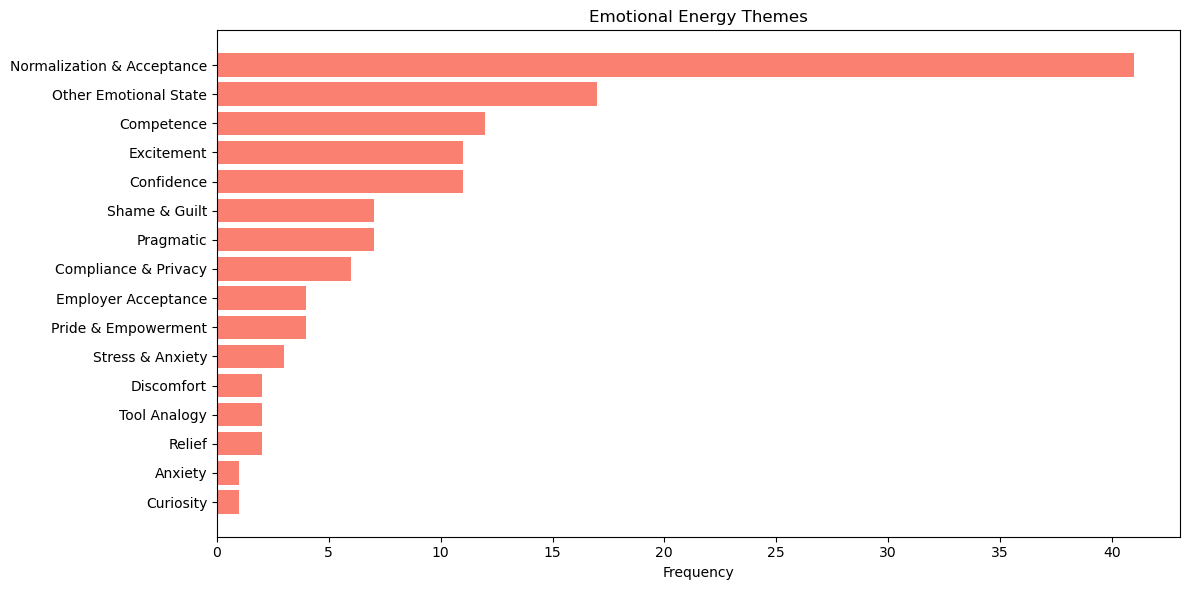

--- Thematic Analysis Results for Emotional Energy ---
Emotional Energy Theme Frequency:
Other Emotional State: 11
Shame & Guilt: 10
Neutral: 40
Pragmatic: 10
Competence: 14
Excitement: 9
Confidence: 13
Discomfort: 4
Anxiety: 2
Curiosity: 2
Pride & Empowerment: 4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def perform_emotional_energy_analysis(df, print_other=False):
    """
    Performs thematic analysis on the 'emotional_energy' column,
    saves a bar plot of theme frequencies, and optionally prints responses
    tagged as 'Other Emotional State'.
    """

    # Preprocess text
    df['emotional_energy'] = (
        df['emotional_energy'].astype(str)
        .str.lower().str.strip()
        .str.replace("i’m", "i am")
        .str.replace("it’s", "it is")
        .str.replace("can't", "cannot")
    )

    # Remove non-informative entries
    non_info = ['.', '', 'don’t know', 'yes', 'nan', 'nothing', 'none',
                'i don\'t know', 'na', 'coding']
    df_clean = df[~df['emotional_energy'].isin(non_info)].copy()

    texts = df_clean['emotional_energy'].tolist()
    indices = df_clean.index.tolist()
    all_codes = []

    for txt in texts:
        codes = []
        # Confidence
        if any(k in txt for k in ['confident', 'i feel confident', 'trust', 'professional', "i'm the founder", 'knowledge']):
            codes.append('Confidence')
        # Competence
        if any(k in txt for k in ['efficient', 'updated', 'productive', 'quality', 'accuracy', 'better solutions']):
            codes.append('Competence')
        # Pragmatic
        if any(k in txt for k in ['necessary', 'time saving', 'convenient', 'proofread', 'shorten time', 'majority of the work', 'just a tool']):
            codes.append('Pragmatic')
        # Tool Analogy
        if any(k in txt for k in ['calculator', 'another tool']):
            codes.append('Tool Analogy')
        # Compliance & Privacy
        if any(k in txt for k in ['data protection', 'it complies', 'report']):
            codes.append('Compliance & Privacy')
        # Employer Acceptance
        if any(k in txt for k in ['employer', 'management', 'supervisor', 'organization encourages']):
            codes.append('Employer Acceptance')
        # Stress
        if any(k in txt for k in ['stress', 'stresses', 'worry', 'anxiety', 'stresses me', 'stresses']):
            codes.append('Stress')
        # Discomfort
        if any(k in txt for k in ['uncomfortable', 'less comfortable', 'not comfortable']):
            codes.append('Discomfort')
        # Shame & Guilt
        if any(k in txt for k in ['shame', 'shameful', 'cheat', 'hide it', 'bad about myself']):
            codes.append('Shame & Guilt')
        # Fear
        if any(k in txt for k in ['lose job', 'threat', 'afraid']):
            codes.append('Fear')
        # Curiosity
        if any(k in txt for k in ['curious', 'explore', 'discover', 'learning']):
            codes.append('Curiosity')
        # Excitement
        if any(k in txt for k in ['exciting', 'empowering', 'love', 'enjoy', 'great', 'happy', 'supportive', 'cool']):
            codes.append('Excitement')
        # Relief
        if any(k in txt for k in ['relieved', 'relief']):
            codes.append('Relief')
        # Pride & Empowerment
        if any(k in txt for k in ['proud', 'empowered', 'satisfaction', 'ownership', 'احس بفخر']):
            codes.append('Pride & Empowerment')
        # Normalization & Acceptance
        if any(k in txt for k in ['normal', 'fine by me', 'ok', 'its ok', 'no big deal', 'fine', 'indifferent','good', 'nice', 'helpful', 'support', 'useful']):
            codes.append('Normalization & Acceptance')
  
        # Specific long reflections
        if 'i don’t mind because i know i do the majority' in txt:
            codes.append('Pragmatic')
        if 'i feel confident in accomplishing tasks and relieved' in txt:
            codes.extend(['Confidence', 'Relief'])
        if 'unable to find an immediate answer' in txt or 'make sure about the resources' in txt:
            codes.append('Anxiety')

        # Fallback
        if not codes:
            codes.append('Other Emotional State')
        all_codes.append(codes)

    df_clean['themes'] = all_codes
    df_clean['themes_str'] = df_clean['themes'].apply(lambda x: '; '.join(x))

    # Frequency and plot
    flat = [c for sub in all_codes for c in sub]
    counts = Counter(flat)
    themes, freqs = zip(*counts.most_common())
    plt.figure(figsize=(12,6))
    plt.barh(themes, freqs, color='salmon')
    plt.gca().invert_yaxis()
    plt.xlabel('Frequency')
    plt.title('Emotional Energy Themes')
    plt.tight_layout()
    plt.savefig('emotional_energy_themes.png', dpi=300)
    plt.show()

    # Print 'Other Emotional State' if requested
    if print_other:
        others = df_clean[df_clean['themes'].apply(lambda lst: 'Other Emotional State' in lst)]
        print("\n--- Responses Tagged as 'Other Emotional State' ---")
        for r in others['emotional_energy']:
            print(f"- {r}")

    return df_clean, counts

if __name__ == '__main__':
    
    df_clean, theme_counts = perform_emotional_energy_analysis(df)
    print("--- Thematic Analysis Results for Emotional Energy ---")
    print("Emotional Energy Theme Frequency:")
    for code, count in emotional_theme_counts.items():
        print(f"{code}: {count}")
